In [21]:
# Impport standard modules
import numpy as np
import random 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.spatial

# Import own modules
import lls
import utils
import knn

# Set seed
np.random.seed(42)

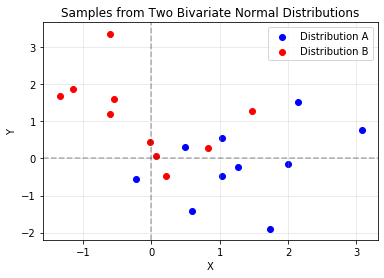

In [22]:
# Task 1.1
# a.)
# Vector of means
mean_a  = [1.5, 0]
mean_b  = [0, 1.5]
# Covariance matrix
cov_a = np.eye(2)
cov_b = np.eye(2)

# Generate random sample from bivariate normal distribution
a = np.random.multivariate_normal(mean_a, cov_a, 10)
b = np.random.multivariate_normal(mean_b, cov_b, 10)

# Scatter plot
plt.figure()
plt.scatter(a[:,0], a[:,1], color = "blue", label = "Distribution A")
plt.scatter(b[:,0], b[:,1], color = "red", label = "Distribution B")

plt.title('Samples from Two Bivariate Normal Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(alpha=0.3)
plt.legend()

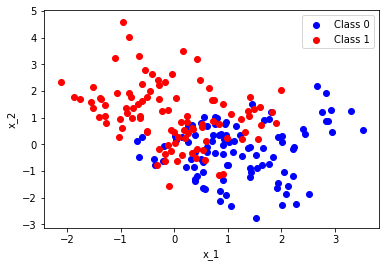

In [23]:
# b.)
# Generate the indices
index_a = np.random.randint(0,10,100)
index_b = np.random.randint(0,10,100)
x = np.zeros((200,2))

# Generate the noise 
mean_noise = [0,0]
cov_noise = 1/4 * np.eye(2)
noise_a = np.random.multivariate_normal(mean_noise, cov_noise, 100)
noise_b = np.random.multivariate_normal(mean_noise, cov_noise, 100)

# Generate the features x
x[0:100] = a[index_a] + noise_a[0:100]
x[100:200] = b[index_b] + noise_b[0:100]

# Scatter plot 
plt.figure()
plt.scatter(x[0:100,0], x[0:100,1], color = "blue", label = "Class 0")
plt.scatter(x[100:200,0], x[100:200,1], color = "red", label = "Class 1")

plt.title('')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()

# c.) 
# Generate the data y
y = np.zeros(200)
y[0:100] = 0
y[100:200] = 1

In [24]:
# Task 1.2
# Run linear least squres
alpha = lls.linear_least_squares(x,y)

# Print coefficients
print('Coefficients by LLS algorithm:')
print(f"α₀ = {alpha[0]:.4f}, α₁ = {alpha[1]:.4f}, α₂ = {alpha[2]:.4f}")

Coefficients by LLS algorithm:
α₀ = 0.5416, α₁ = -0.1898, α₂ = 0.1520


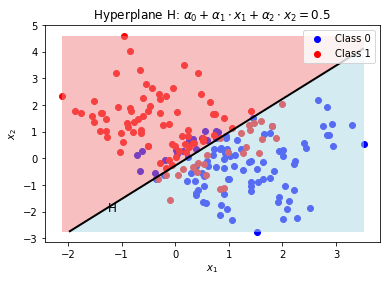

In [25]:
# Plot the separating hyperplane
x1_min = np.min(x[:,0])
x1_max = np.max(x[:,0])
x2_min = np.min(x[:,1])
x2_max = np.max(x[:,1])

# Generate the meshgrid for hyperplane 
x1_vals, x2_vals = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                       np.linspace(x2_min, x2_max, 300))

Z = alpha[0] + alpha[1] * x1_vals + alpha[2] * x2_vals
threshold = 0.5

# Scatter plot with separating hyperplane
plt.figure()
plt.scatter(x[0:100,0], x[0:100,1], color = "blue", label = "Class 0")
plt.scatter(x[100:200,0], x[100:200,1], color = "red", label = "Class 1")
plt.contour(x1_vals, x2_vals, Z, levels = [threshold], colors='k', linestyles='-', linewidths=2)
plt.contourf(x1_vals, x2_vals, Z, levels=[-np.inf, threshold, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.annotate(
    'H',                # Text label
    xy=(-1.25, -2),     # Point to annotate
    xytext=(-1.25,-2),  # Location of text
    #arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
    fontsize=12
)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Hyperplane H: $\\alpha_0 + \\alpha_1 \\cdot x_1 + \\alpha_2 \\cdot x_2 = 0.5$')
plt.legend()
plt.show()

In [26]:
# Print results for the training data 
print('Confusion matrix on training data: ')
print(lls.confusion_matrix(x, y, alpha, threshold))
print('Accuracy on training data: ')
print(lls.accuracy(lls.confusion_matrix(x, y, alpha, threshold)))

Confusion matrix on training data: 
[[82 27]
 [18 73]]
Accuracy on training data: 
0.775


In [27]:
# Task 1.4
# Construct new test data for the classifier from task 1.3

# Vector of means
mean_a  = [3/2, 0]
mean_b  = [0, 3/2]
# Covariance matrix
cov_a = np.eye(2)
cov_b = np.eye(2)

# Generate random sample from bivariate normal distribution
a = np.random.multivariate_normal(mean_a, cov_a, 10)
b = np.random.multivariate_normal(mean_b, cov_b, 10)


# Generate the indices
index_a = np.random.randint(0,10,10000)
index_b = np.random.randint(0,10,10000)
x_new = np.zeros((20000,2))

# Generate the noise 
mean_noise = [0,0]
cov_noise = 1/4 * np.eye(2)
noise_a = np.random.multivariate_normal(mean_noise, cov_noise, 10000)
noise_b = np.random.multivariate_normal(mean_noise, cov_noise, 10000)

# Generate the data x
x_new[0:10000] = a[index_a] + noise_a[0:10000]
x_new[10000:20000] = b[index_b] + noise_b[0:10000]

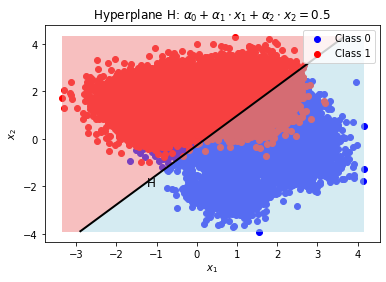

Confusion matrix for test data:  [[7888 1350]
 [2112 8650]]
Accuracy for test data 0.8269


In [28]:
# Scatter plot 
x1_min = np.min(x_new[:,0])
x1_max = np.max(x_new[:,0])
x2_min = np.min(x_new[:,1])
x2_max = np.max(x_new[:,1])

# Generate the meshgrid for hyperplane 
x1_vals, x2_vals = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                       np.linspace(x2_min, x2_max, 300))

Z = alpha[0] + alpha[1] * x1_vals + alpha[2] * x2_vals

threshold = 0.5

plt.figure()
plt.scatter(x_new[0:10000,0], x_new[0:10000,1], color = "blue", label = "Class 0")
plt.scatter(x_new[10000:20000,0], x_new[10000:20000,1], color = "red", label = "Class 1")
plt.contour(x1_vals, x2_vals, Z, levels = [threshold], colors='k', linestyles='-', linewidths=2)
plt.contourf(x1_vals, x2_vals, Z, levels=[-np.inf, threshold, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.annotate(
    'H',                # Text label
    xy=(-1.25, -2),     # Point to annotate
    xytext=(-1.25,-2),  # Location of text
    #arrowprops=dict(facecolor='black', arrowstyle='->'),  # Arrow style
    fontsize=12
)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Hyperplane H: $\\alpha_0 + \\alpha_1 \\cdot x_1 + \\alpha_2 \\cdot x_2 = 0.5$')
plt.legend()
plt.show()


# c.) 
# Generate the new data y
y_new = np.zeros(20000)
y_new[0:10000] = 0
y_new[10000:20000] = 1

# Construct confusion matrix for the new test data with classifier from before
confusion_matrix_test = lls.confusion_matrix(x_new, y_new, alpha, threshold)
accuracy_test = lls.accuracy(confusion_matrix_test)

# Print the results for the test data 
print('Confusion matrix for test data: ', confusion_matrix_test)
print('Accuracy for test data', accuracy_test)

In [29]:
# Task 1.5
# a.)
# Import the Iris data set 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
irisDataFrame = pd.read_csv(url , header = None, names=column_names)


In [30]:
# a.1)
# Set the number of observations
n = len(irisDataFrame)

# We use the classification of y_i = 0 for Iris-setosa and y_i = 1 for Iris-versicolor and Iris-virginica
y_iris = np.ones(n)
y_iris[irisDataFrame['class'] == 'Iris-setosa'] = 0

# Construct the feature data using only sepal_length and sepal_width (change pandas data frame to numpy array)
x_iris = irisDataFrame[['sepal_length', 'sepal_width']].to_numpy()

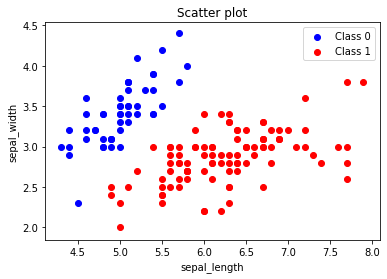

In [31]:
# Scatter plot for the data 
plt.figure()
plt.scatter(x_iris[0:50,0], x_iris[0:50,1], color = "blue", label = "Class 0")
plt.scatter(x_iris[50:150,0], x_iris[50:150,1], color = "red", label = "Class 1")
plt.title('Scatter plot')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

Coefficients with two features:
Coefficients: α₀ = 0.2069, α₁ = 0.3771, α₂ = -0.5709


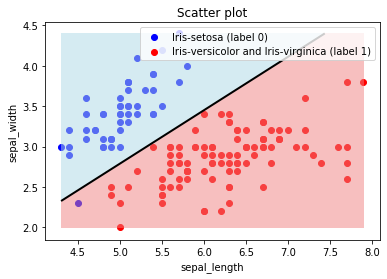

In [32]:
# Run the LLS
alpha_iris = lls.linear_least_squares(x_iris,y_iris) 

# Print coefficients
print('Coefficients with two features:')
print(f"Coefficients: α₀ = {alpha_iris[0]:.4f}, α₁ = {alpha_iris[1]:.4f}, α₂ = {alpha_iris[2]:.4f}")

# Plot the separating hyperplane
x1_min = np.min(x_iris[:,0])
x1_max = np.max(x_iris[:,0])
x2_min = np.min(x_iris[:,1])
x2_max = np.max(x_iris[:,1])

# Generate the meshgrid for hyperplane 
x1_vals, x2_vals = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                       np.linspace(x2_min, x2_max, 300))
Z = alpha_iris[0] + alpha_iris[1] * x1_vals + alpha_iris[2] * x2_vals
threshold = 0.5

plt.figure()
plt.scatter(x_iris[0:50,0], x_iris[0:50,1], color = "blue", label = "Iris-setosa (label 0)")
plt.scatter(x_iris[50:150,0], x_iris[50:150,1], color = "red", label = "Iris-versicolor and Iris-virginica (label 1)")
plt.contour(x1_vals, x2_vals, Z, levels = [threshold], colors='k', linestyles='-', linewidths=2)
plt.contourf(x1_vals, x2_vals, Z, levels=[-np.inf, threshold, np.inf], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

In [33]:
# Construct confusion matrix for two features
confusion_matrix_2features = lls.confusion_matrix(x_iris, y_iris, alpha_iris, threshold)
accuracy_2features = lls.accuracy(confusion_matrix_2features)

# Print the results for the test data 
print('Results with two feature:')
print('Confusion matrix for test data: ', confusion_matrix_2features)
print('Accuracy for test data', accuracy_2features)

Results with two feature:
Confusion matrix for test data:  [[ 49   0]
 [  1 100]]
Accuracy for test data 0.9933333333333333


In [34]:
# a.2)
# Rerun the LLS with four features
x_iris_4features = irisDataFrame[['sepal_length', 'sepal_width','petal_length', 'petal_width' ]].to_numpy()
alpha_iris_4features = lls.linear_least_squares(x_iris_4features,y_iris) 
# Print coefficients
print(f"Coefficients: α₀ = {alpha_iris_4features[0]:.4f}, α₁ = {alpha_iris_4features[1]:.4f}, α₂ = {alpha_iris_4features[2]:.4f}, α3 = {alpha_iris_4features[3]:.4f}, α_4 = {alpha_iris_4features[4]:.4f}")

# Construct confusion matrix for two features
confusion_matrix_4features = lls.confusion_matrix(x_iris_4features, y_iris, alpha_iris_4features, threshold)
accuracy_4features = lls.accuracy(confusion_matrix_4features)
print('Results with four features:')
print('Confusion matrix with four features: ', confusion_matrix_4features)
print('Accuracy with four features', accuracy_4features)

Coefficients: α₀ = 0.8775, α₁ = -0.0656, α₂ = -0.2425, α3 = 0.2228, α_4 = 0.0634
Results with four features:
Confusion matrix with four features:  [[ 50   0]
 [  0 100]]
Accuracy with four features 1.0


In [35]:
# b.) 
y_iris_new = np.ones(n)
y_iris_new[irisDataFrame['class'] == 'Iris-versicolor'] = 0

# Construct the feature data using only sepal_length and sepal_width (change pandas data frame to numpy array)
x_iris_2features = irisDataFrame[['sepal_length', 'sepal_width']].to_numpy()
x_iris_4features = irisDataFrame[['sepal_length', 'sepal_width', 'petal_length', 'petal_width' ]].to_numpy()

alpha_iris_2features_new = lls.linear_least_squares(x_iris_2features, y_iris_new) 
alpha_iris_4features_new = lls.linear_least_squares(x_iris_4features, y_iris_new) 


# Construct confusion matrix for two features
confusion_matrix_2features_new = lls.confusion_matrix(x_iris_2features, y_iris_new, alpha_iris_2features_new, threshold)
accuracy_2features = lls.accuracy(confusion_matrix_2features_new)

# Print the results for the test data 
print('Results with two feature:')
print('Confusion matrix with two features: ', confusion_matrix_2features)
print('Accuracy two features', accuracy_2features)


# Construct confusion matrix for four features
confusion_matrix_4features_new = lls.confusion_matrix(x_iris_4features, y_iris_new, alpha_iris_4features_new, threshold)
accuracy_2features = lls.accuracy(confusion_matrix_4features_new)

# Print the results for the test data 
print('Results with four feature:')
print('Confusion matrix with four features: ', confusion_matrix_4features)
print('Accuracy with four features', accuracy_4features)

Results with two feature:
Confusion matrix with two features:  [[ 49   0]
 [  1 100]]
Accuracy two features 0.7266666666666667
Results with four feature:
Confusion matrix with four features:  [[ 50   0]
 [  0 100]]
Accuracy with four features 1.0


In [36]:
# Task 1.6
# Import the Iris data set 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
irisDataFrame = pd.read_csv(url , header = None, names=column_names)

# Set the number of observations
n = len(irisDataFrame)

# We use the classification of y_i = 0 for Iris-setosa and y_i = 1 for Iris-versicolor and Iris-virginica
y_iris = np.ones(n)
y_iris[irisDataFrame['class'] == 'Iris-setosa'] = 0

# Construct the feature data using only sepal_length and sepal_width (change pandas data frame to numpy array)
x_iris = irisDataFrame[['sepal_length', 'sepal_width']].to_numpy()

In [37]:
# Call the gradient descent algorithm
alpha_2features_gd = utils.gradient_descent_lls(x_iris, y_iris, nu=0.001, eps =  1e-6, maxiter = 1000)[0]
# Print the results
print('Coefficient vector with two features by gradient decent: ' )
print(f"α₀ = {alpha_2features_gd[0]:.4f}, α₁ = {alpha_2features_gd[1]:.4f}, α₂ = {alpha_2features_gd[2]:.4f}")

Coefficient vector with two features by gradient decent: 
α₀ = 0.4058, α₁ = 0.0391, α₂ = 0.0188


In [38]:
# Choose optimal step nu
nu_values = [1, 0.1, 0.01, 0.001]
convergence_search = []
# Run the 
for nu in nu_values: 
    convergence_search.append(utils.gradient_descent_lls(x_iris, y_iris, nu, eps =  1e-6, maxiter = 1000)[2])

# Choose maximal nu 
optimal_nu = max(convergence_search)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/Uriel/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 01/utils.py:39: RuntimeWarning: overflow encountered in square
  J = (1/n_obs)*np.sum((y_predicted - y)**2)
/Users/Uriel/Documents/Uni/Studium/Bonn (Mathematik)/SS 2025/Practical Lab/Sheet 01/utils.py:70: RuntimeWarning: invalid value encountered in subtract
  alpha_new = alpha - nu*grad_J


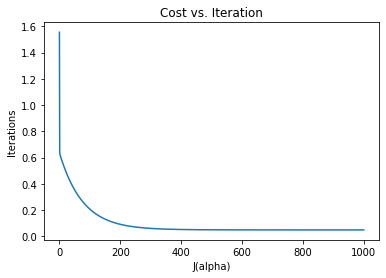

In [39]:
# Plot J vs. the number of iterations for optimal nu
J_values_2features = utils.gradient_descent_lls(x_iris, y_iris, nu=0.01, eps =  1e-6, maxiter = 1000)[1]

plt.figure()
plt.plot(J_values_2features)
plt.title('Cost vs. Iteration')
plt.xlabel('J(alpha)')
plt.ylabel('Iterations')
plt.show()

In [40]:
# Task 1.7
# Import the Iris data set 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
irisDataFrame = pd.read_csv(url , header = None, names=column_names)

iris_2features = irisDataFrame[['sepal_length', 'sepal_width']]
means = iris_2features.mean()
stds = iris_2features.std()
iris_2features_normalized = (iris_2features - means)/stds

# Construct the feature data using only sepal_length and sepal_width (change pandas data frame to numpy array)
iris_2features_normalized = iris_2features_normalized[['sepal_length', 'sepal_width']].to_numpy()
y_iris[irisDataFrame['class'] == 'Iris-setosa'] = 0

# Redo the gradient descent with the normalized data 
alpha_normalized = utils.gradient_descent_lls(iris_2features_normalized, y_iris, nu=0.01, eps =  1e-6, maxiter = 1000)[0]
J_values_normalized = utils.gradient_descent_lls(iris_2features_normalized, y_iris, nu=0.01, eps =  1e-6, maxiter = 1000)[1]

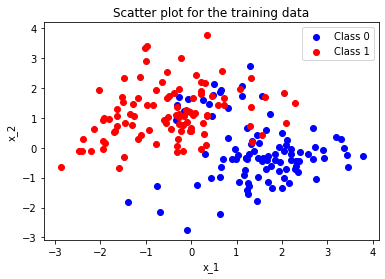

In [41]:
# Task 1.8 (k-nearest Neigbour)
# Generate the dataset fromm Task 1.1
# Vector of means
mean_a  = [1.5, 0]
mean_b  = [0, 1.5]
# Covariance matrix
cov_a = np.eye(2)
cov_b = np.eye(2)

# Generate random sample from bivariate normal distribution
a = np.random.multivariate_normal(mean_a, cov_a, 10)
b = np.random.multivariate_normal(mean_b, cov_b, 10)

# Generate the indices
index_a = np.random.randint(0,10,100)
index_b = np.random.randint(0,10,100)
X = np.zeros((200,2))

# Generate the noise 
mean_noise = [0,0]
cov_noise = (1/4) * np.eye(2)
noise_a = np.random.multivariate_normal(mean_noise, cov_noise, 100)
noise_b = np.random.multivariate_normal(mean_noise, cov_noise, 100)

# Generate the features X
X[0:100] = a[index_a] + noise_a[0:100]
X[100:200] = b[index_b] + noise_b[0:100]
X_train = X.copy()

# Generate the labels y
y = np.zeros(200)
y[0:100] = 0
y[100:200] = 1
y_train = y.copy()

# Obtain the indices for the labels y=0 and y=1
indices_0_train = np.where(y_train==0)[0]
indices_1_train = np.where(y_train==1)[0]

# Set parameters for scatter and contour plots
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                         np.linspace(x2_min, x2_max, 100))
# Concatenate along vertical axis
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Scatter plot of the feature data 
plt.figure()
plt.scatter(X[indices_0_train,0], X[indices_0_train,1], color = "blue", label = "Class 0")
plt.scatter(X[indices_1_train,0], X[indices_1_train,1], color = "red", label = "Class 1")
plt.title('Scatter plot for the training data')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.show()


Classification results for k = 1:
--------------------------------------
Confusion matrix for kNN Algorithm with k = 1
[[ 79   0]
 [ 21 100]]
Accuracy for the kNN Algorithm with k = 1
0.895


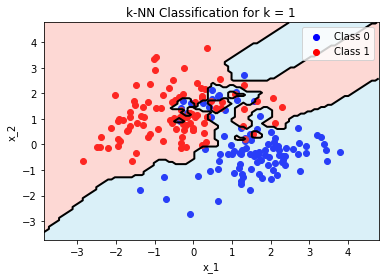


Classification results for k = 15:
--------------------------------------
Confusion matrix for kNN Algorithm with k = 15
[[80  5]
 [20 95]]
Accuracy for the kNN Algorithm with k = 15
0.875


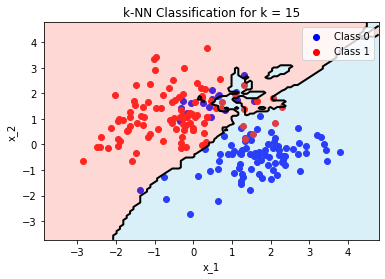


Classification results for k = 30:
--------------------------------------
Confusion matrix for kNN Algorithm with k = 30
[[81  8]
 [19 92]]
Accuracy for the kNN Algorithm with k = 30
0.865


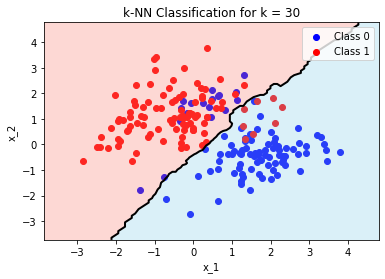

In [42]:
# Task 1.8
k_values = [1, 15, 30]

for k in k_values:
    y_predicted_label, near_neigh  = knn.kNN_classifier(X_test= X_train, X_train=X_train, y_train=y_train, k = k)
    confusion_matrix = knn.confusion_matrix_knn(y_train, y_predicted_label)
    print(f"\nClassification results for k = {k}:")
    print('--------------------------------------')
    print('Confusion matrix for kNN Algorithm with k =', k)
    print(confusion_matrix)
    print('Accuracy for the kNN Algorithm with k =', k)
    print(knn.accuracy(confusion_matrix))

    y_predicted_label_new, near_neigh_new = knn.kNN_classifier(grid_points, X, y, k = k)
    Z = near_neigh_new.reshape(xx1.shape)
    
    plt.figure()
    plt.scatter(X[indices_0_train,0], X[indices_0_train,1], color = "blue", label = "Class 0")
    plt.scatter(X[indices_1_train,0], X[indices_1_train,1], color = "red", label = "Class 1")
    plt.contour(xx1, xx2, Z, levels=[0.5], colors='black', linewidths=2)
    plt.contourf(xx1, xx2, Z, levels=[0, 0.5, 1], colors=['skyblue', 'salmon'], alpha=0.3)

    plt.title(f'k-NN Classification for k = {k}')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend()
    plt.show()

In [43]:
# Task 1.9
# a.)
# Compute the knn-Algorithm for k=1,...,200
accuray_store_train = np.zeros(200)
for k in range(198):
    y_predicted,_ = knn.kNN_classifier(X_test = X_train, X_train = X_train, y_train = y_train, k = k+1)
    print('Accuracy of the kNN-Algorithm for k =', k+1)
    acc = knn.accuracy(knn.confusion_matrix_knn(y, y_predicted))
    accuray_store_train[k] = acc
    print(acc)

Accuracy of the kNN-Algorithm for k = 1
0.895
Accuracy of the kNN-Algorithm for k = 2
0.92
Accuracy of the kNN-Algorithm for k = 3
0.89
Accuracy of the kNN-Algorithm for k = 4
0.895
Accuracy of the kNN-Algorithm for k = 5
0.885
Accuracy of the kNN-Algorithm for k = 6
0.905
Accuracy of the kNN-Algorithm for k = 7
0.885
Accuracy of the kNN-Algorithm for k = 8
0.865
Accuracy of the kNN-Algorithm for k = 9
0.87
Accuracy of the kNN-Algorithm for k = 10
0.86
Accuracy of the kNN-Algorithm for k = 11
0.855
Accuracy of the kNN-Algorithm for k = 12
0.85
Accuracy of the kNN-Algorithm for k = 13
0.87
Accuracy of the kNN-Algorithm for k = 14
0.86
Accuracy of the kNN-Algorithm for k = 15
0.875
Accuracy of the kNN-Algorithm for k = 16
0.88
Accuracy of the kNN-Algorithm for k = 17
0.87
Accuracy of the kNN-Algorithm for k = 18
0.875
Accuracy of the kNN-Algorithm for k = 19
0.875
Accuracy of the kNN-Algorithm for k = 20
0.88
Accuracy of the kNN-Algorithm for k = 21
0.865
Accuracy of the kNN-Algorithm fo

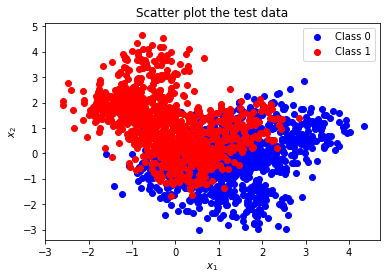

In [44]:
# b.)
np.random.seed(42)
# Regenerate the test data set from Task 1.4
# Vector of means
mean_a  = [1.5, 0]
mean_b  = [0, 1.5]
# Covariance matrix
cov_a = np.eye(2)
cov_b = np.eye(2)

# Generate random sample from bivariate normal distribution
a = np.random.multivariate_normal(mean_a, cov_a, 10)
b = np.random.multivariate_normal(mean_b, cov_b, 10)

# Generate the indices
index_a = np.random.randint(0,10,1000)
index_b = np.random.randint(0,10,1000)
# Generate the noise 
mean_noise = [0,0]
cov_noise = 1/4 * np.eye(2)
noise_a = np.random.multivariate_normal(mean_noise, cov_noise, 1000)
noise_b = np.random.multivariate_normal(mean_noise, cov_noise, 1000)

# Generate the data X
X_test = np.zeros((2000,2))
X_test[0:1000] = a[index_a] + noise_a[0:1000]
X_test[1000:2000] = b[index_b] + noise_b[0:1000]

# Generate the labels y=1, y=0 for the test data
y_new= np.zeros(2000)
y_new[0:1000] = 0
y_new[1000:2000] = 1
y_test = y_new.copy()

# Obtain the indices for the labels y=0 and y=1
indices_0_test = np.where(y_test==0)[0]
indices_1_test = np.where(y_test==1)[0]

# Set parameters for scatter and contour plots
x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                         np.linspace(x2_min, x2_max, 100))
# Concatenate along vertical axis
grid_points = np.c_[xx1.ravel(), xx2.ravel()]

# Scatter plot of the test data
plt.figure()
plt.scatter(X_test[indices_0_test,0], X_test[indices_0_test,1], color = "blue", label = "Class 0")
plt.scatter(X_test[indices_1_test,0], X_test[indices_1_test,1], color = "red", label = "Class 1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatter plot the test data')
plt.legend()
plt.show()


Classification results for k = 1:
--------------------------------------
Confusion matrix for kNN Algorithm with k = 1
[[770 243]
 [230 757]]
Accuracy for the kNN Algorithm with k = 1
0.7635


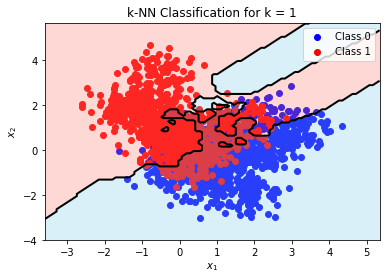


Classification results for k = 15:
--------------------------------------
Confusion matrix for kNN Algorithm with k = 15
[[805 231]
 [195 769]]
Accuracy for the kNN Algorithm with k = 15
0.787


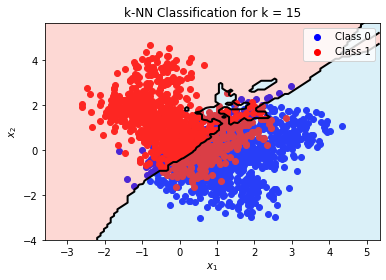


Classification results for k = 30:
--------------------------------------
Confusion matrix for kNN Algorithm with k = 30
[[810 225]
 [190 775]]
Accuracy for the kNN Algorithm with k = 30
0.7925


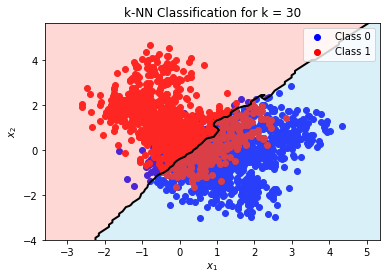

In [45]:
k_values = [1, 15, 30]

for k in k_values:
    y_predicted_label, near_neigh  = knn.kNN_classifier(X_test = X_test, X_train = X_train, y_train=y_train, k = k)
    confusion_matrix = knn.confusion_matrix_knn(y_test, y_predicted_label)
    print(f"\nClassification results for k = {k}:")
    print('--------------------------------------')
    print('Confusion matrix for kNN Algorithm with k =', k)
    print(confusion_matrix)
    print('Accuracy for the kNN Algorithm with k =', k)
    print(knn.accuracy(confusion_matrix))
    knn.kNN_decision_plot(X_test, y_test, X_train, y_train, k)


In [46]:
# Compute the knn-Algorithm for k=1,...,200
accuray_store_test = np.zeros(200)
for k in range(198):
    y_predicted,_ = knn.kNN_classifier(X_test = X_test, X_train=X_train, y_train=y_train, k=k+1)
    print('Accuary of the kNN-Algorithm for k =', k+1)
    acc = knn.accuracy(knn.confusion_matrix_knn(y_test, y_predicted))
    accuray_store_test[k] = acc
    print(acc)

Accuary of the kNN-Algorithm for k = 1
0.7635
Accuary of the kNN-Algorithm for k = 2
0.7525
Accuary of the kNN-Algorithm for k = 3
0.7695
Accuary of the kNN-Algorithm for k = 4
0.7725
Accuary of the kNN-Algorithm for k = 5
0.7795
Accuary of the kNN-Algorithm for k = 6
0.7675
Accuary of the kNN-Algorithm for k = 7
0.7725
Accuary of the kNN-Algorithm for k = 8
0.774
Accuary of the kNN-Algorithm for k = 9
0.778
Accuary of the kNN-Algorithm for k = 10
0.783
Accuary of the kNN-Algorithm for k = 11
0.7805
Accuary of the kNN-Algorithm for k = 12
0.7795
Accuary of the kNN-Algorithm for k = 13
0.781
Accuary of the kNN-Algorithm for k = 14
0.7825
Accuary of the kNN-Algorithm for k = 15
0.787
Accuary of the kNN-Algorithm for k = 16
0.789
Accuary of the kNN-Algorithm for k = 17
0.7895
Accuary of the kNN-Algorithm for k = 18
0.791
Accuary of the kNN-Algorithm for k = 19
0.7905
Accuary of the kNN-Algorithm for k = 20
0.7925
Accuary of the kNN-Algorithm for k = 21
0.7905
Accuary of the kNN-Algorithm 